# Football Manager 2020 - Oyuncu Değer Tahmini Projesi

Bu projede Football Manager 2020 veri seti kullanılarak oyuncuların çeşitli özelliklerine göre piyasa değeri tahmini yapılacaktır.  
Projede gözetimli öğrenme teknikleri kullanılacak, model eğitimi, değerlendirmesi ve hiperparametre optimizasyonu gerçekleştirilecektir.



###  Gerekli Kütüphanelerin Yüklenmesi
Projede veri işleme, analiz ve görselleştirme işlemleri için gerekli Python kütüphaneleri (`pandas`, `numpy`, `matplotlib`, `seaborn`) yüklenmiştir.


In [31]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "DejaVu Sans"





###  Veri Setinin Yüklenmesi
`google.colab` üzerinden `.csv` formatındaki veri dosyası yüklenmiştir. Bu adımda, bir dosya seçilmiş ve dosya Colab ortamına aktarılmıştır.


In [32]:
from google.colab import files
uploaded = files.upload()



Saving datafm20.csv to datafm20 (2).csv


###  Veri Setinin Yüklenmesi ve Ön İncelemesi
Yüklenen `.csv` dosyası `pandas` kütüphanesi ile `read_csv()` fonksiyonu kullanılarak okunmuştur. `df.head()` komutu ile veri setinin ilk 5 satırı incelenmiştir.


In [33]:
import pandas as pd

df = pd.read_csv("datafm20.csv")
df.head()



,Unnamed: 0,Name,Position,Club,Division,Based,Nation,Height,Weight,Age,...,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc
0,0,Lionel Messi,"AM (RC), ST (C)",Barcelona,Spanish First Division,Spain (First Division),ARG,170,72,32,...,18,2,2,10,19,19,19,7,2,18
1,1,Cristiano Ronaldo,"AM (RL), ST (C)",Juventus,Italian Serie A,Italy (Serie A),POR,185,83,34,...,14,4,1,16,14,18,13,6,2,15
2,2,Kylian MbappÃ©,"AM (RL), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),FRA,178,73,20,...,18,2,1,12,14,17,16,6,4,20
3,3,Manuel Neuer,GK,FC Bayern,Bundesliga,Germany (Bundesliga),GER,192,90,33,...,20,12,17,14,14,19,15,8,14,13
4,4,Neymar,"M (L), AM (LC), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),BRA,175,68,27,...,17,3,1,14,14,16,18,10,4,17


###  Veri Seti Boyutu ve Yapısal Özellikleri
Bu adımda veri setinin kaç satır ve sütundan oluştuğu, sütun adları ve veri tipleri incelenmiştir. Ayrıca eksik veri olup olmadığı gözlemlenmiştir.


In [34]:
# Veri setinin boyutu (satır, sütun)
print("Veri seti boyutu:", df.shape)

# Sütun isimleri
print("\nSütun isimleri:\n", df.columns.tolist())

# Veri tipleri ve eksik değer kontrolü
df.info()

df.head(10)

Veri seti boyutu: (144750, 64)

Sütun isimleri:
 ['Unnamed: 0', 'Name', 'Position', 'Club', 'Division', 'Based', 'Nation', 'Height', 'Weight', 'Age', 'Preferred Foot', 'Best Pos', 'Best Role', 'Value', 'Wage', 'CA', 'PA', 'Wor', 'Vis', 'Thr', 'Tec', 'Tea', 'Tck', 'Str', 'Sta', 'TRO', 'Ref', 'Pun', 'Pos', 'Pen', 'Pas', 'Pac', '1v1', 'OtB', 'Nat', 'Mar', 'L Th', 'Lon', 'Ldr', 'Kic', 'Jum', 'Hea', 'Han', 'Fre', 'Fla', 'Fir', 'Fin', 'Ecc', 'Dri', 'Det', 'Dec', 'Cro', 'Cor', 'Cnt', 'Cmp', 'Com', 'Cmd', 'Bra', 'Bal', 'Ant', 'Agi', 'Agg', 'Aer', 'Acc']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144750 entries, 0 to 144749
Data columns (total 64 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      144750 non-null  int64 
 1   Name            144750 non-null  object
 2   Position        144750 non-null  object
 3   Club            144750 non-null  object
 4   Division        144750 non-null  object
 5   Based           1

,Unnamed: 0,Name,Position,Club,Division,Based,Nation,Height,Weight,Age,...,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc
0,0,Lionel Messi,"AM (RC), ST (C)",Barcelona,Spanish First Division,Spain (First Division),ARG,170,72,32,...,18,2,2,10,19,19,19,7,2,18
1,1,Cristiano Ronaldo,"AM (RL), ST (C)",Juventus,Italian Serie A,Italy (Serie A),POR,185,83,34,...,14,4,1,16,14,18,13,6,2,15
2,2,Kylian MbappÃ©,"AM (RL), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),FRA,178,73,20,...,18,2,1,12,14,17,16,6,4,20
3,3,Manuel Neuer,GK,FC Bayern,Bundesliga,Germany (Bundesliga),GER,192,90,33,...,20,12,17,14,14,19,15,8,14,13
4,4,Neymar,"M (L), AM (LC), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),BRA,175,68,27,...,17,3,1,14,14,16,18,10,4,17
5,5,Erling Haaland,ST (C),Borussia Dortmund,Bundesliga,Germany (Bundesliga),NOR,194,87,18,...,17,2,3,14,17,16,14,13,3,15
6,6,Kevin De Bruyne,"M (RLC), AM (C)",Man City,English Premier Division,England (Premier Division),BEL,181,70,27,...,15,2,2,14,14,13,13,12,2,15
7,7,Luis SuÃ¡rez,"AM (RLC), ST (C)",A. Madrid,Spanish First Division,Spain (First Division),URU,182,86,32,...,17,3,1,17,12,16,14,17,3,14
8,8,Gianluigi Buffon,GK,Juventus,Italian Serie A,Italy (Serie A),ITA,192,92,41,...,18,20,20,17,13,17,7,5,14,6
9,9,Gareth Bale,"M (L), AM (RLC), ST (C)",Tottenham,English Premier Division,England (Premier Division),WAL,185,82,29,...,12,3,2,11,13,14,13,11,2,14


###  Eksik Verilerin Kontrolü
Veri setindeki eksik değerlerin kontrolü yapılmıştır. `isnull().sum()` metodu ile her sütundaki eksik değer sayısı hesaplanmış ve ilk 20 sütun listelenmiştir. Sonuçlara göre veri setinde eksik değer bulunmamaktadır.


In [35]:
# Eksik değerlerin toplamı
print("\nEksik veri sayısı:")
print(df.isnull().sum().sort_values(ascending=False).head(20))



Eksik veri sayısı:
Unnamed: 0        0
Name              0
Position          0
Club              0
Division          0
Based             0
Nation            0
Height            0
Weight            0
Age               0
Preferred Foot    0
Best Pos          0
Best Role         0
Value             0
Wage              0
CA                0
PA                0
Wor               0
Vis               0
Thr               0
dtype: int64


###  Oyuncuların Yaş Dağılımı
Seaborn kütüphanesi ile oyuncuların yaş dağılımını gösteren histogram oluşturulmuştur. Histogramda ayrıca KDE  ile dağılımın şekli görselleştirilmiştir. Bu analiz, oyuncu yaşlarının büyük kısmının 20–27 yaş arasında yoğunlaştığını göstermektedir.


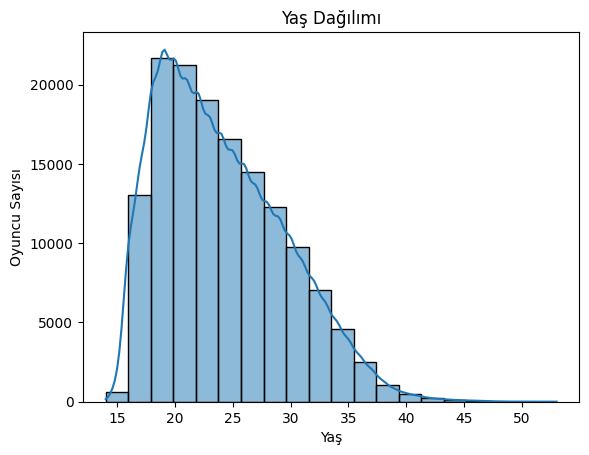

In [36]:
# Oyuncuların yaş dağılımı
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Oyuncu Sayısı")
plt.show()


###  Temel İstatistiksel Bilgiler
`Value` ve `Wage` sütunlarına ait temel istatistikler `describe()` fonksiyonu ile incelenmiştir.
Bu sayede oyuncuların piyasa değerleri ve maaşlarının dağılımı hakkında genel bilgiler edinilmiştir.


In [37]:
df[['Value', 'Wage']].describe()



,Value,Wage
count,1.447500e+05,1.447500e+05
mean,3.503583e+05,1.605965e+03
std,2.392352e+06,1.037654e+04
min,0.000000e+00,0.000000e+00
25%,1.700000e+02,0.000000e+00
50%,9.000000e+03,1.600000e+02
75%,6.500000e+04,6.000000e+02
max,9.100000e+07,1.200000e+06


###  Gereksiz Sütunların Temizlenmesi
Analiz ve modelleme açısından faydasız olan sütunlar (`Name`, `Club`, `Division`, `Nationality`, vb.) veri setinden çıkarılmıştır. Bu sayede modele etki etmeyecek bilgilerden arındırılmış daha sade bir veri seti elde edilmiştir.


In [38]:
# Gereksiz sütunları düşürüyorum
df.drop(columns=["Unnamed: 0", "Name", "Club", "Division", "Based", "Nationality", "Photo"], inplace=True, errors='ignore')

# Kalan sütunları kontrol edelim
df.columns


Index(['Position', 'Nation', 'Height', 'Weight', 'Age', 'Preferred Foot',
       'Best Pos', 'Best Role', 'Value', 'Wage', 'CA', 'PA', 'Wor', 'Vis',
       'Thr', 'Tec', 'Tea', 'Tck', 'Str', 'Sta', 'TRO', 'Ref', 'Pun', 'Pos',
       'Pen', 'Pas', 'Pac', '1v1', 'OtB', 'Nat', 'Mar', 'L Th', 'Lon', 'Ldr',
       'Kic', 'Jum', 'Hea', 'Han', 'Fre', 'Fla', 'Fir', 'Fin', 'Ecc', 'Dri',
       'Det', 'Dec', 'Cro', 'Cor', 'Cnt', 'Cmp', 'Com', 'Cmd', 'Bra', 'Bal',
       'Ant', 'Agi', 'Agg', 'Aer', 'Acc'],
      dtype='object')

###  Eksik Verilerin Son Kontrolü
Güncel veri setinde eksik değer olup olmadığı tekrar kontrol edilmiştir. Sonuçlara göre tüm sütunlar eksiksizdir.


In [39]:
# Eksik veri var mı?
print(df.isnull().sum().sort_values(ascending=False).head(15))


Position          0
Nation            0
Height            0
Weight            0
Age               0
Preferred Foot    0
Best Pos          0
Best Role         0
Value             0
Wage              0
CA                0
PA                0
Wor               0
Vis               0
Thr               0
dtype: int64


###
 Kategorik Değişkenlerin Sayısal Dönüşümü
`Position`, `Preferred Foot`, `Best Pos`, `Best Role` gibi kategorik değişkenler `LabelEncoder` ile sayısal değerlere dönüştürülmüştür. Bu dönüşüm, makine öğrenmesi algoritmalarının bu verilerle çalışabilmesi için gereklidir.


In [40]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in ['Position', 'Preferred Foot', 'Best Pos', 'Best Role']:
    if col in df.columns:
        df[col] = encoder.fit_transform(df[col])


###  Oyuncu Değerlerinin Dönüştürülmesi
`Value` sütununda "€", "M" (milyon), "K" (bin) gibi karakterler içeren string ifadeler bulunmaktaydı. Bu sütun `convert_value` fonksiyonu ile float tipine çevrilerek modellemeye uygun hale getirilmiştir.


In [41]:
def convert_value(val):
    if isinstance(val, str):
        val = val.replace("€", "")
        if "M" in val:
            return float(val.replace("M", "")) * 1_000_000
        elif "K" in val:
            return float(val.replace("K", "")) * 1_000
        else:
            return float(val)
    return val

df["Value"] = df["Value"].apply(convert_value)


###  Oyuncu Değeri Dağılımı
Sayısal hale getirilen `Value` sütunu üzerinde `describe()` fonksiyonu kullanılarak dağılım bilgileri analiz edilmiştir.


In [42]:
df["Value"].describe()


,Value
count,1.447500e+05
mean,3.503583e+05
std,2.392352e+06
min,0.000000e+00
25%,1.700000e+02
50%,9.000000e+03
75%,6.500000e+04
max,9.100000e+07


###  Kategorik (object) Veri Tiplerini Listeleme
Veri setindeki `object` veri tipine sahip sütunlar (yani sayısal olmayanlar) belirlenerek sonraki encoding adımlarına hazırlanmıştır.


In [43]:
df.dtypes[df.dtypes == "object"]


,0
Nation,object


 Kategorik veriler LabelEncoder kullanılarak sayısal değerlere dönüştürüldü. Modelin bu verileri işleyebilmesi için gerekli bir ön işleme adımıdır.



In [44]:
from sklearn.preprocessing import LabelEncoder

label_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [49]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Value"])
y = df["Value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 Doğrusal Regresyon (Linear Regression) modeli eğitildi ve test verileri üzerinde tahmin yapıldı. Modelin başarımı MSE (Hata Kareler Ortalaması), MAE (Ortalama Mutlak Hata) ve R² (determinasyon katsayısı) ile değerlendirildi.


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Skoru: {r2:.4f}")


MSE: 2717117755935.19
MAE: 366471.65
R2 Skoru: 0.5100


 Karar Ağacı Regressor modeli eğitildi ve test verileri üzerinde değerlendirme yapıldı. Modelin başarımı MSE, MAE ve R² metrikleriyle ölçüldü. Doğrusal regresyona kıyasla daha düşük hatalar ve daha yüksek R² değeri elde edildi.


In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


tree_model = DecisionTreeRegressor(random_state=42)


tree_model.fit(X_train, y_train)


y_pred_tree = tree_model.predict(X_test)


mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(" Decision Tree")
print(f"MSE: {mse_tree:.2f}")
print(f"MAE: {mae_tree:.2f}")
print(f"R2 Skoru: {r2_tree:.4f}")


 Decision Tree
MSE: 1302824272425.35
MAE: 171978.92
R2 Skoru: 0.7650


 GridSearchCV ve DecisionTreeRegressor sınıfları hiperparametre optimizasyonu ve model oluşturmak için projeye dahil edildi.


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


 Karar Ağacı modeli için denenecek hiperparametre kombinasyonları tanımlandı. max_depth, min_samples_split ve min_samples_leaf gibi parametreler, modelin genelleme kapasitesini etkiler.


In [53]:
# Karar ağacı için test edilecek parametre kombinasyonları
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


 Hedef değişken olarak 'Value' sütunu belirlendi ve bağımsız değişkenlerden (`X`) ayrıldı. Ardından eğitim ve test setlerine %80-%20 oranında ayrım yapıldı.


In [54]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Value"])
y = df["Value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



 Bu hücrede, `X_train` veri setindeki kategorik (object) türdeki ilk birkaç sütun incelenmiştir. Bu sütunlar modelin anlayabilmesi için sayısal değerlere dönüştürülmelidir.


In [55]:
X_train.select_dtypes(include='object').head()



""
138330
137362
19059
104022
64730


 Modelin çalışabilmesi için kategorik sütunlar `LabelEncoder` kullanılarak sayısal verilere dönüştürülmüştür. Eğitim ve test verilerindeki bilinmeyen etiket sorununu önlemek için tüm unique değerler encode edilmektedir.


In [56]:
from sklearn.preprocessing import LabelEncoder

label_cols = X_train.select_dtypes(include='object').columns

for col in label_cols:
    le = LabelEncoder()
    le.fit(list(X_train[col].astype(str)) + list(X_test[col].astype(str)))
    X_train[col] = le.transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))



 `GridSearchCV`, belirlenen hiperparametre kombinasyonlarıyla `DecisionTreeRegressor` modelini eğitir ve en iyi sonucu veren parametreleri seçer. Bu işlem, 5 katlı çapraz doğrulama (cross-validation) yöntemi kullanılarak gerçekleştirilmiştir. Bu sayede modelin genellenebilirliği artırılır ve aşırı öğrenmenin önüne geçilir.



In [57]:

#  GridSearch ile model eğitimi
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits



 Bu hücrede `X_test` veri setinde kategorik (object) türde herhangi bir sütunun kalmadığı kontrol edilmiştir. Model eğitimi için veri ön işleme başarıyla tamamlanmıştır.


In [58]:
X_test.select_dtypes(include='object').columns


Index([], dtype='object')

###  Modelin Test Seti Üzerindeki Performansı

Eğitilen en iyi model (`best_tree`) kullanılarak **test veri seti** üzerindeki tahminler gerçekleştirilmiştir. Modelin başarımını değerlendirmek amacıyla üç farklı metrik hesaplanmıştır:

- **MSE (Mean Squared Error)**: Ortalama kare hata.
- **MAE (Mean Absolute Error)**: Ortalama mutlak hata.
- **R² (R-Kare Skoru)**: Modelin doğruluk derecesini gösteren katsayı. 1’e ne kadar yakınsa, modelin başarısı o kadar yüksektir.

Aşağıdaki kod ile test sonuçları hesaplanmıştır:

>  Bu sonuçlara göre modelin test verileri üzerindeki performansı gözlemlenir ve farklı modellerle karşılaştırma yapılabilir.



In [59]:
# Tahmin ve test sonuçları
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_best = best_tree.predict(X_test)

print("\n TEST SETİ SONUÇLARI")
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("R2 :", r2_score(y_test, y_pred_best))



 TEST SETİ SONUÇLARI
MSE: 1035546060256.8307
MAE: 181763.68960216342
R2 : 0.8132396045167377
